
# Example notebook

Load data, fit and plot anomalies with different models and time frames setup



In [1]:
from prophet import Prophet

c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
from datetime import datetime

In [4]:
import prophet

In [5]:
prophet.__version__

'1.1.1'

### Load data

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')

In [7]:
# df.fillna(method='ffill', inplace=True)
# df = df.drop_duplicates(subset=['ds'])

In [8]:
df.shape

(2905, 2)

In [9]:
df.dtypes

ds     object
y     float64
dtype: object

In [10]:
df.ds = pd.to_datetime(df.ds)
df.index = df.ds

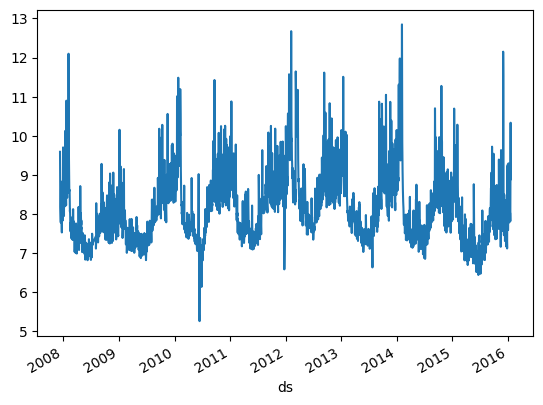

In [11]:
df.y.plot()
plt.show()

In [12]:
# use specific time frame for simplicity
df = df[(df.ds >= datetime(2011, 1, 1)) & (df.ds < datetime(2013, 3, 1))]

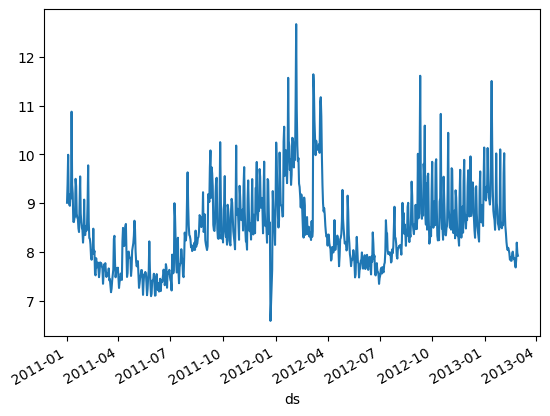

In [13]:
df.y.plot()
plt.show()

### Load utility functions
Code reference [here](https://github.com/paullo0106/prophet_anomaly_detection/blob/master/utils.py)

In [14]:
from utils import prophet_fit, prophet_plot, get_outliers

### Model training

In [15]:
# df = df.reset_index()

In [16]:
# df.drop(columns='ds', inplace=True)

c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Use the data from {} to {} ({} days)'.format(df['ds'][0],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['ds'][today_index - 1],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print

Cutoff date:  2011-02-18 00:00:00
Use the data from 2011-01-01 00:00:00 to 2011-02-17 00:00:00 (48 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)


INFO:cmdstanpy:finish chain 1


=====
actual value 7.51969240411654 fall outside of the prediction interval
interval: 7.593759374293652 to 8.668801588588144
Date: 2011-02-20
=====
actual value 7.75061473277041 fall outside of the prediction interval
interval: 6.623763150556961 to 7.684158757920659
Date: 2011-03-01


c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:165: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objec

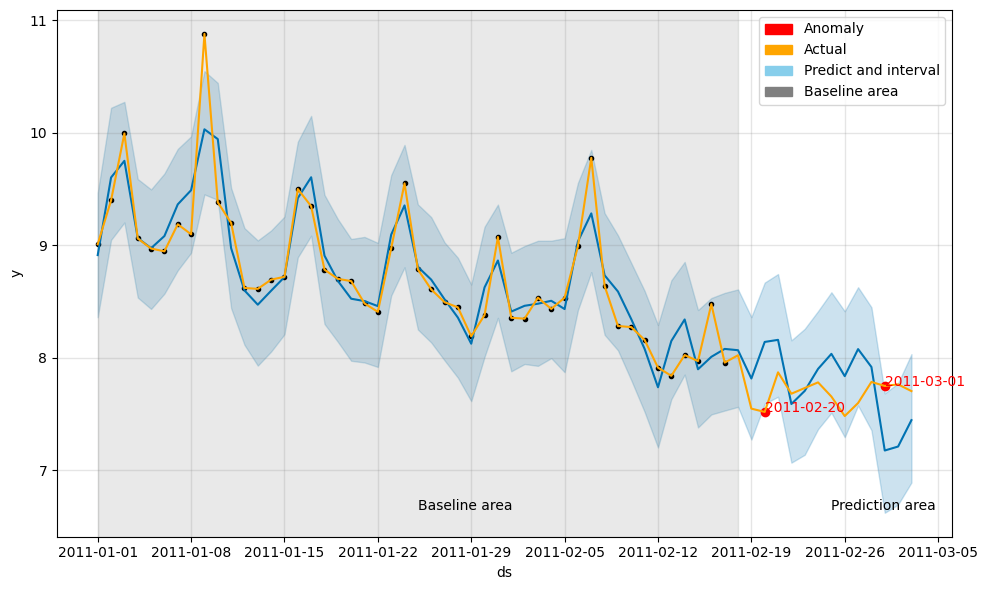

In [17]:
alpha=0.98

model = Prophet(interval_width=alpha,
                # growth="linear",
                # daily_seasonality=False,
                yearly_seasonality=False, 
                weekly_seasonality=False, #holidays=us_public_holidays, 
                changepoint_prior_scale=0.5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date: ', df.index[today_index])

predict_n = 14

fig, forecast, model = prophet_fit(df, model, today_index, predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, predict_days=predict_n, outliers=outliers)


c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Use the data from {} to {} ({} days)'.format(df['ds'][0],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['ds'][today_index - 1],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print

Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-01 00:00:00 to 2011-02-17 00:00:00 (48 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


=====
actual value 7.51969240411654 fall outside of the prediction interval
interval: 7.658229892159844 to 8.556529115304308
Date: 2011-02-20
=====
actual value 7.59890045687141 fall outside of the prediction interval
interval: 7.646071450101619 to 8.551053315072783
Date: 2011-02-27
=====
actual value 7.75061473277041 fall outside of the prediction interval
interval: 6.731423418522873 to 7.668399019021337
Date: 2011-03-01
=====
actual value 7.76472054477148 fall outside of the prediction interval
interval: 6.774504000653629 to 7.6807502580250455
Date: 2011-03-02


c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:165: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_pred.index = df_pred['ds'].dt.to_pydatetime()
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

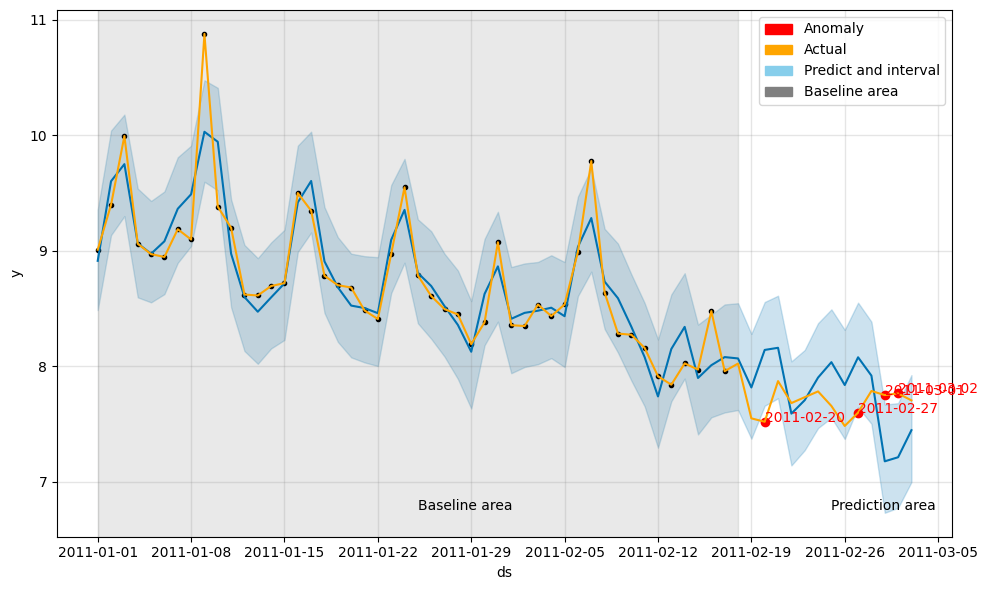

In [18]:
alpha=0.95

model = Prophet(interval_width=alpha, 
                yearly_seasonality=False, 
                weekly_seasonality=False,
                changepoint_prior_scale=0.5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14

fig, forecast, model = prophet_fit(df, model, today_index, predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, predict_days=predict_n, outliers=outliers)

### Identify outliers

Look for the outliers in the dataframe

In [19]:
print('Predictions')
print(df_pred.head())
df_outlier = df_pred[(df_pred.actual > df_pred.upper_y) | (df_pred.actual < df_pred.lower_y)]
print('Outliers')
print(df_outlier.head())

Predictions
                   ds     preds   lower_y   upper_y    actual
2011-02-18 2011-02-18  8.068046  7.621377  8.546230  8.023552
2011-02-19 2011-02-19  7.816674  7.372968  8.280532  7.549083
2011-02-20 2011-02-20  8.141676  7.658230  8.556529  7.519692
2011-02-21 2011-02-21  8.160176  7.723048  8.611195  7.871693
2011-02-22 2011-02-22  7.590088  7.141389  8.042379  7.681560
Outliers
                   ds     preds   lower_y   upper_y    actual
2011-02-20 2011-02-20  8.141676  7.658230  8.556529  7.519692
2011-02-27 2011-02-27  8.077979  7.646071  8.551053  7.598900
2011-03-01 2011-03-01  7.177065  6.731423  7.668399  7.750615
2011-03-02 2011-03-02  7.212304  6.774504  7.680750  7.764721


### Experiment different time frame

c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Use the data from {} to {} ({} days)'.format(df['ds'][today_index - lookback_days],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['ds'][today_index - 1],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-14 00:00:00 to 2011-02-17 00:00:00 (35 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)


INFO:cmdstanpy:finish chain 1
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:165: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series co

=====
actual value 8.02355239240435 fall outside of the prediction interval
interval: 6.476348128280089 to 6.952170880718116
Date: 2011-02-18
=====
actual value 7.54908271081229 fall outside of the prediction interval
interval: 4.257048993917725 to 5.01557036397743
Date: 2011-02-19
=====
actual value 7.51969240411654 fall outside of the prediction interval
interval: 2.703733365508125 to 3.8346698859782435
Date: 2011-02-20
=====
actual value 7.87169266432365 fall outside of the prediction interval
interval: 2.08671112099308 to 3.7024879605730705
Date: 2011-02-21
=====
actual value 7.68156036255954 fall outside of the prediction interval
interval: 1.533610097378497 to 3.8519368922372204
Date: 2011-02-22
=====
actual value 7.73236922228439 fall outside of the prediction interval
interval: 1.8516997726893303 to 4.824892115666458
Date: 2011-02-23
=====
actual value 7.78239033558746 fall outside of the prediction interval
interval: 1.4573978234441856 to 5.134982610224268
Date: 2011-02-24
===

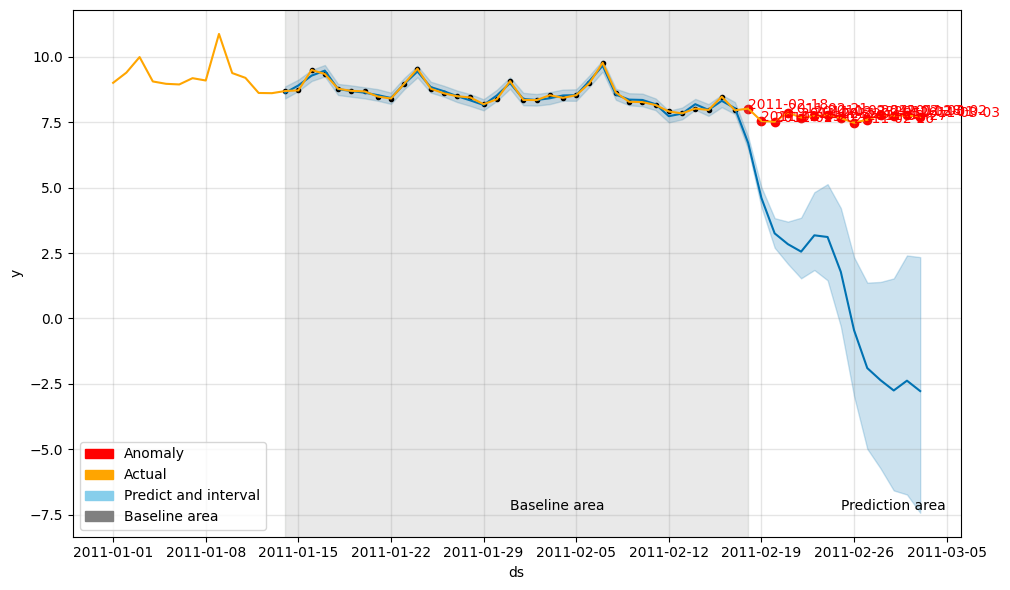

In [20]:
alpha=0.98

model = Prophet(interval_width=alpha, 
                yearly_seasonality=False, 
                weekly_seasonality=False, 
                changepoint_prior_scale=0.5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14
lookback_n = 35

fig, forecast, model = prophet_fit(df, model, today_index, 
                                   lookback_days=lookback_n, 
                                   predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, 
             predict_days=predict_n, 
             lookback_days=lookback_n, 
             outliers=outliers)

### Experiment with different model parameters
Lower the changepoint scale to 0.1, as the previous fit seems off

c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Use the data from {} to {} ({} days)'.format(df['ds'][today_index - lookback_days],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['ds'][today_index - 1],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-14 00:00:00 to 2011-02-17 00:00:00 (35 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)
=====
actual value 7.78239033558746 fall outside of the prediction interval
interval: 7.864033342512452 to 8.564877221260302
Date: 2011-02-24
=====
actual value 7.65633716643018 fall outside of the prediction interval
interval: 7.816748568907103 to 8.493544935235628
Date: 2011-02-25
=====
actual value 7.75061473277041 fall outside of the prediction interval
interval: 6.867734374774983 to 7.592192806422233
Date: 2011-03-01


c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:165: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objec

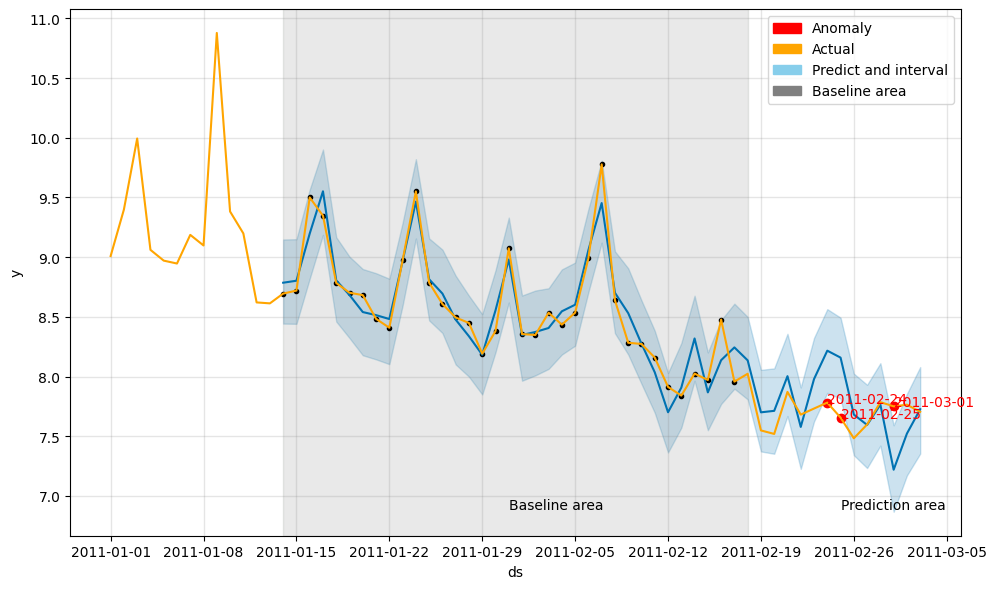

In [21]:
alpha=0.98

model = Prophet(interval_width=alpha, 
                     yearly_seasonality=False, 
                     weekly_seasonality=False, 
                     changepoint_prior_scale=0.1)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14
lookback_n = 35

fig, forecast, model = prophet_fit(df, model, today_index, 
                                   lookback_days=lookback_n, 
                                   predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, lookback_days=lookback_n, 
             predict_days=predict_n, outliers=outliers)



c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Use the data from {} to {} ({} days)'.format(df['ds'][today_index - lookback_days],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['ds'][today_index - 1],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-21 00:00:00 to 2011-02-17 00:00:00 (28 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)


INFO:prophet:n_changepoints greater than number of observations. Using 21.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


=====
actual value 7.70481192293259 fall outside of the prediction interval
interval: 6.378895157223203 to 7.646326694711408
Date: 2011-03-03


c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:165: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objec

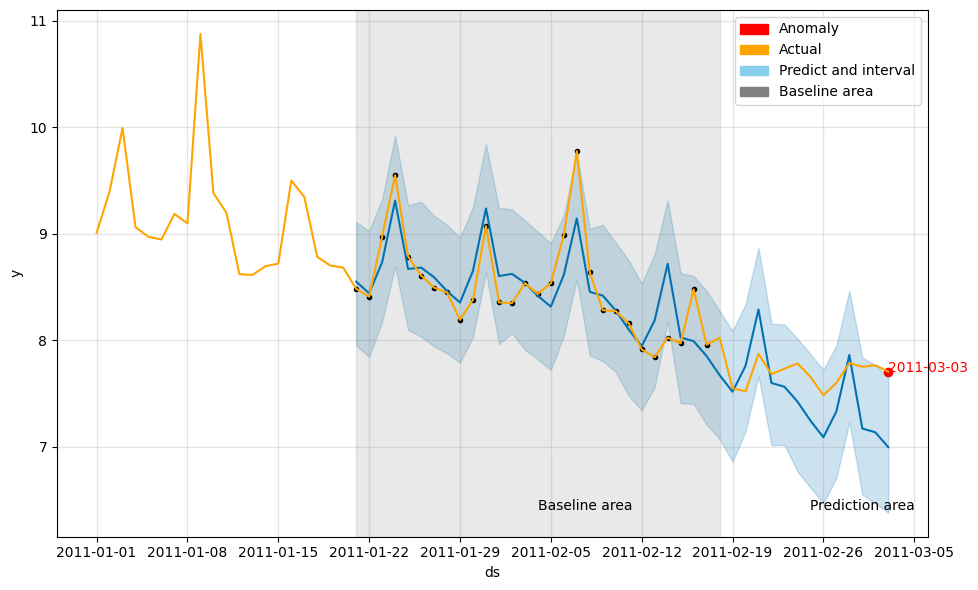

In [22]:
# changepoint_prior_scale: 0.1
# no monthly trend
alpha=0.98

model = Prophet(interval_width=alpha, 
                yearly_seasonality=False, 
                weekly_seasonality=False, 
                changepoint_prior_scale=0.1)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14
lookback_n = 28

fig, forecast, model = prophet_fit(df, model, today_index, 
                                   lookback_days=lookback_n, 
                                   predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, lookback_days=lookback_n, 
             predict_days=predict_n, outliers=outliers)

c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Use the data from {} to {} ({} days)'.format(df['ds'][today_index - lookback_days],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['ds'][today_index - 1],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-21 00:00:00 to 2011-02-17 00:00:00 (28 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)


INFO:cmdstanpy:finish chain 1
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:165: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series co

=====
actual value 7.75061473277041 fall outside of the prediction interval
interval: 6.648685617754423 to 7.708670034627845
Date: 2011-03-01
=====
actual value 7.76472054477148 fall outside of the prediction interval
interval: 6.570227606915687 to 7.660595643454913
Date: 2011-03-02
=====
actual value 7.70481192293259 fall outside of the prediction interval
interval: 6.447638662673873 to 7.572956157978992
Date: 2011-03-03


c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:180: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('interval: {} to {}'.format(df_pred['lower_y'][i], df_pred['upper_y'][i]))
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:103: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  x_pydatetime = df['ds'].dt.to_pydatetime()


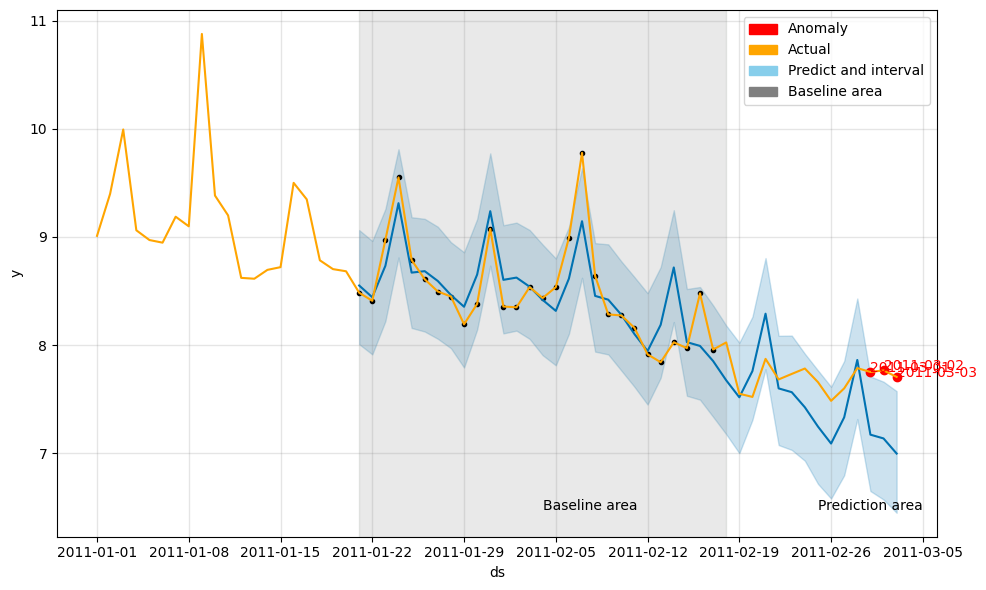

In [23]:
# decrease the confidence interval
alpha=0.95    

model = Prophet(interval_width=alpha, 
                     yearly_seasonality=False, 
                     weekly_seasonality=False, 
                     changepoint_prior_scale=0.1)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14
lookback_n = 28

fig, forecast, model = prophet_fit(df, model, today_index, 
                                   lookback_days=lookback_n, 
                                   predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, lookback_days=lookback_n, 
             predict_days=predict_n, outliers=outliers)

### Experiment different time frames

Cutoff date:

c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Use the data from {} to {} ({} days)'.format(df['ds'][today_index - lookback_days],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['ds'][today_index - 1],
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

 2011-03-19 00:00:00
Use the data from 2011-02-12 00:00:00 to 2011-03-18 00:00:00 (35 days)
Predict 2011-03-19 00:00:00 to 2011-04-08 00:00:00 (21 days)


c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\jarl1\Git\GitHub\anomaly_detection\notebooks\utils.py:165: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objec

=====
actual value 7.41397029019044 fall outside of the prediction interval
interval: 7.476494240973588 to 7.852382567837314
Date: 2011-03-21
=====
actual value 8.26975694753298 fall outside of the prediction interval
interval: 7.191325727490851 to 7.571730405080902
Date: 2011-03-24
=====
actual value 8.33134542484572 fall outside of the prediction interval
interval: 7.044298876115326 to 7.436681664098863
Date: 2011-03-25
=====
actual value 7.78447323573647 fall outside of the prediction interval
interval: 6.888371268300359 to 7.28431902063158
Date: 2011-03-26
=====
actual value 7.59739632021279 fall outside of the prediction interval
interval: 7.655020712799048 to 8.121108232546284
Date: 2011-03-30
=====
actual value 7.42833319419081 fall outside of the prediction interval
interval: 7.506634492758423 to 8.134824482831968
Date: 2011-04-04
=====
actual value 7.55747290161475 fall outside of the prediction interval
interval: 7.5590316375924145 to 8.261513498246059
Date: 2011-04-05
=====


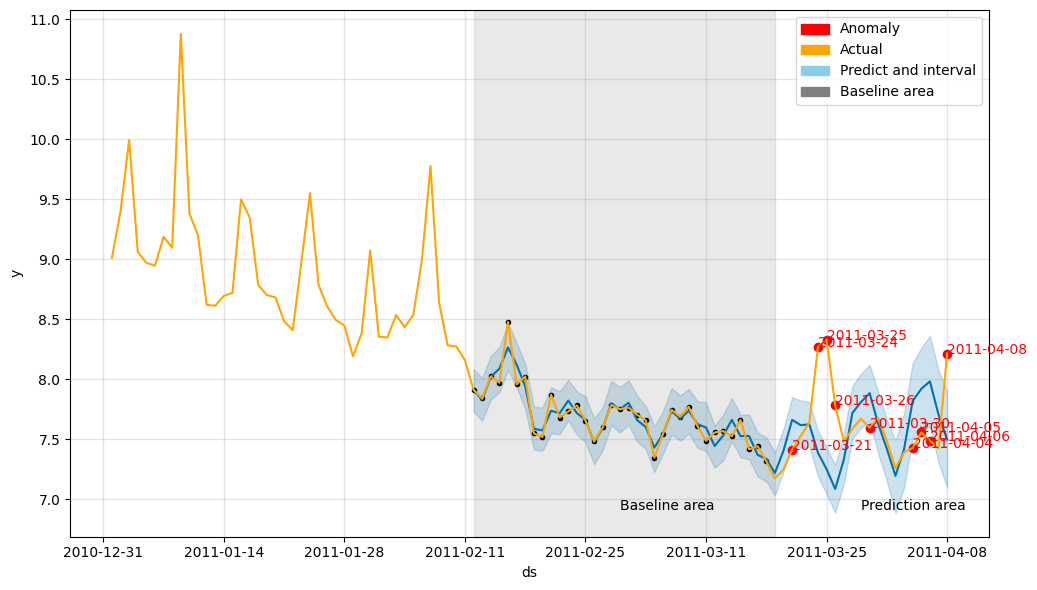

In [24]:
# different timeframe segments

alpha = 0.98
model = Prophet(interval_width=alpha, 
                     yearly_seasonality=False, 
                     weekly_seasonality=False, #holidays=us_public_holidays, 
                     changepoint_prior_scale=0.5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 77
print('Cutoff date:', df.index[today_index])

predict_n = 21
lookback_n = 35

fig, forecast, model = prophet_fit(df, model, today_index, lookback_days=lookback_n, predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, lookback_days=lookback_n, predict_days=predict_n, outliers=outliers)

### Other usage
* Diagnose the pattern with time-series decomposition
* Look at performance metrics including MSE, RMSE, MAP, MAPE (see [Prophet docs](https://facebook.github.io/prophet/docs/diagnostics.html) for details)

c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:395: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\jarl1\Git\GitHub\anomaly_detection\anom-venv\lib\site-packages\prophet\plot.py:399: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

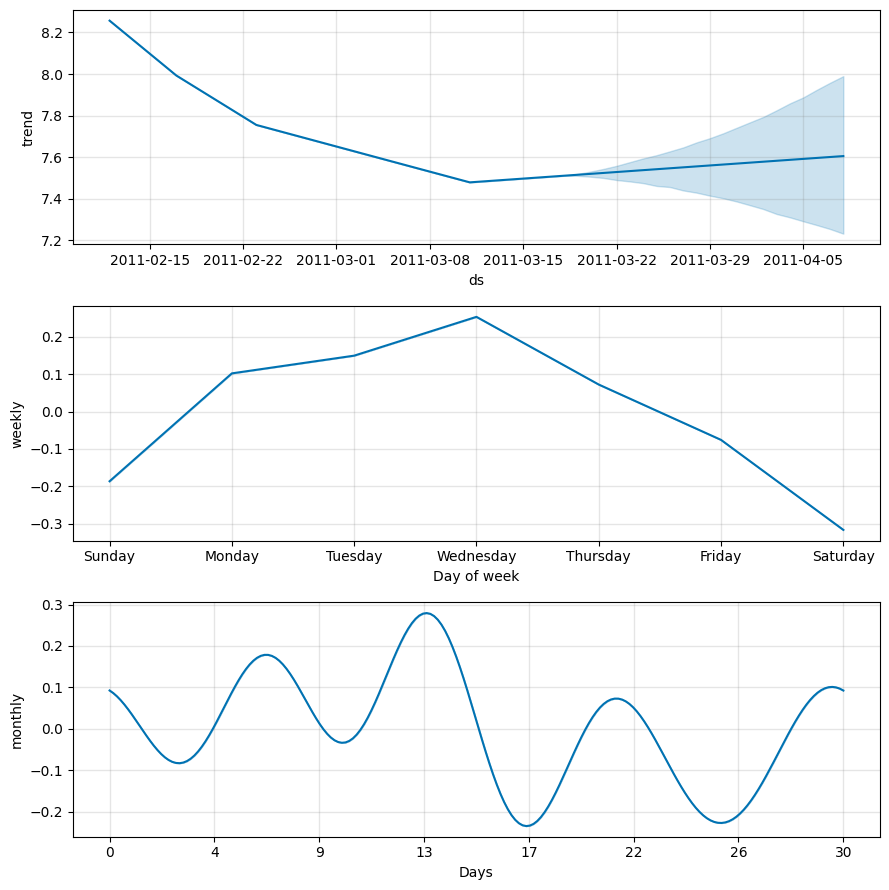

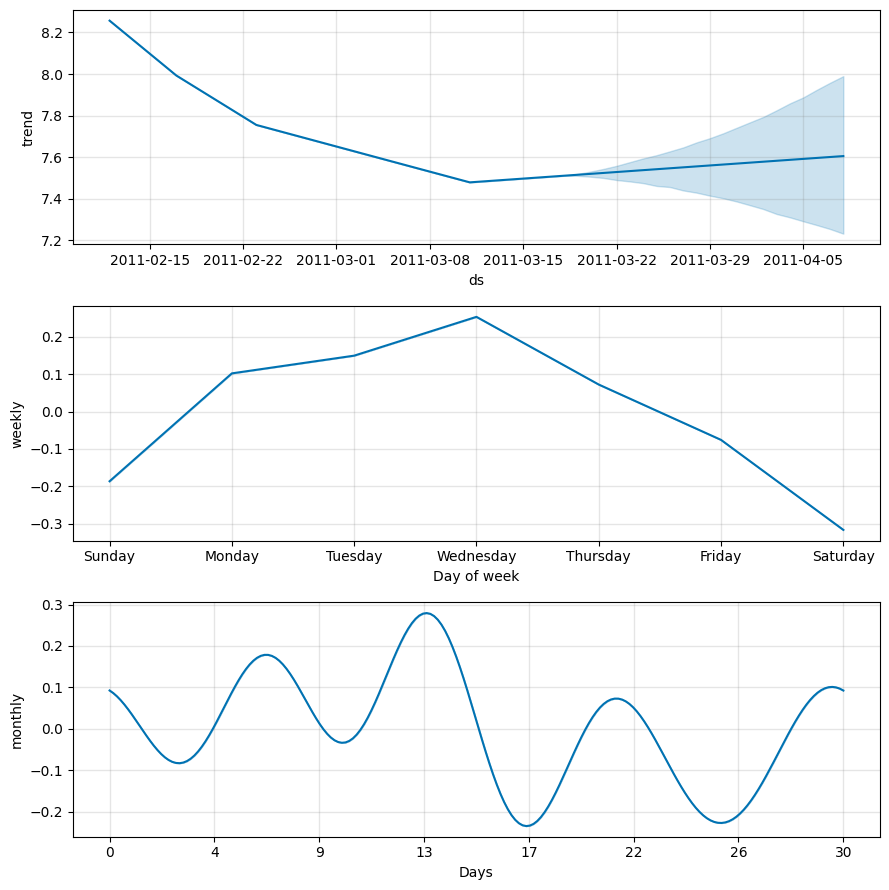

In [25]:
model.plot_components(forecast)

In [26]:
from fbprophet.diagnostics import cross_validation, performance_metrics


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
df_cv = cross_validation(model, horizon='3 days')
df_p = performance_metrics(df_cv)
df_p.head(10)

INFO:fbprophet:Making 11 forecasts with cutoffs between 2011-01-30 00:00:00 and 2011-02-14 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.
INFO:fbprophet:n_changepoints greater than number of observations.Using 16.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,horizon,mse,rmse,mae,mape,coverage
0,0 days 12:00:00,0.057196,0.239158,0.183666,0.022328,0.600000
1,1 days 00:00:00,0.204375,0.452078,0.340429,0.040556,0.500000
2,1 days 12:00:00,0.134576,0.366846,0.288295,0.034653,0.600000
3,2 days 00:00:00,0.647238,0.804511,0.621303,0.074298,0.333333
4,2 days 12:00:00,0.202579,0.450088,0.381107,0.045841,0.600000
5,3 days 00:00:00,0.578891,0.760849,0.677993,0.083059,0.500000
